In [208]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/original.csv


# LOADING THE DATASET

In [209]:
df=pd.read_csv("/kaggle/input/original.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
3,2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
4,2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400
...,...,...,...,...,...,...,...
246,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
247,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
248,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
249,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [210]:
df.shape

(251, 7)

In [211]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [212]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,921.121193,926.898963,915.331412,921.780837,921.780837,1.476208e+06
std,77.250572,78.339844,76.358400,77.232561,77.232561,6.376379e+05
min,778.809998,789.630005,775.799988,786.140015,786.140015,5.370000e+05
25%,835.755005,841.975006,831.254975,836.994995,836.994995,1.089450e+06
50%,929.919983,934.729980,923.619995,929.570007,929.570007,1.287600e+06
75%,972.969971,979.365021,965.515015,972.759979,972.759979,1.639000e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,5.167700e+06


In [213]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997991,0.997091,0.995392,0.995392,-0.004185
High,0.997991,1.000000,0.997251,0.997830,0.997830,0.010887
Low,0.997091,0.997251,1.000000,0.998292,0.998292,-0.038353
Close,0.995392,0.997830,0.998292,1.000000,1.000000,-0.022428
Adj Close,0.995392,0.997830,0.998292,1.000000,1.000000,-0.022428
Volume,-0.004185,0.010887,-0.038353,-0.022428,-0.022428,1.000000


In [214]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [215]:
High=np.array(df['High'])
Low=np.array(df['Low'])
Close=np.array(df['Close'])
# print(High)
# print("//////////")
# print("Low")
# print(Low)
# print("/////////")
# print("Close")
# print(Close)

In [216]:
High.shape

(251,)

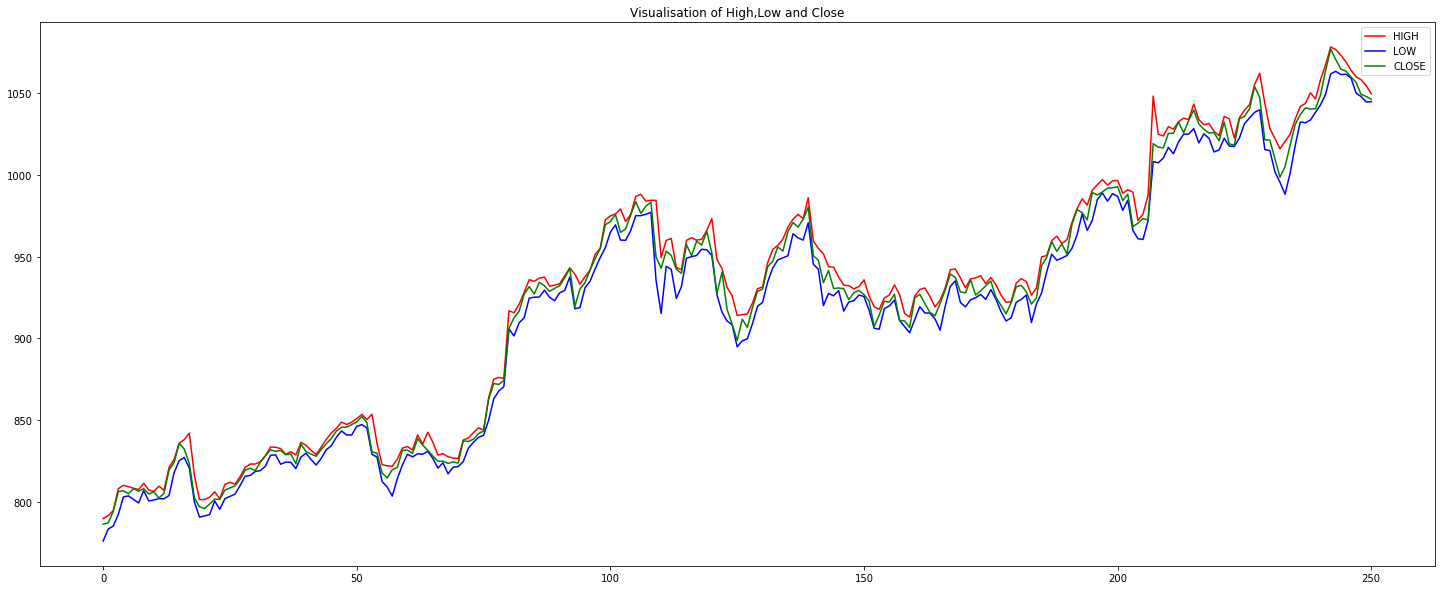

In [217]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(High,color='red',label='HIGH')
plt.plot(Low,color='blue',label='LOW')
plt.plot(Close,color='green',label='CLOSE')
plt.title('Visualisation of High,Low and Close')
plt.legend()
plt.show()

# Here we are observing that Close lies between High and Low.

# Here we will select High and Low as independent and Close as dependent Variable

In [218]:
X=df.iloc[:,2:4]
X

,High,Low
0,789.630005,775.799988
1,791.340027,783.159973
2,794.479980,785.020020
3,807.900024,792.203979
4,809.966003,802.830017
...,...,...
246,1064.199951,1059.439941
247,1060.119995,1050.199951
248,1058.369995,1048.050049
249,1054.750000,1044.770020


In [219]:
X_new=np.array(X)
X_new.shape

(251, 2)

In [220]:
Y=df.iloc[:,4:5]
Y

,Close
0,786.140015
1,786.900024
2,794.020020
3,806.150024
4,806.650024
...,...
246,1060.119995
247,1056.739990
248,1049.369995
249,1048.140015


In [221]:
Y_new=np.array(Y)
Y_new.shape

(251, 1)

In [222]:
scalar=MinMaxScaler()
scalar.fit(X_new)
X_new=scalar.transform(X_new)

In [223]:
X_new[0:10]

array([[0.        , 0.        ],
       [0.0059199 , 0.0255777 ],
       [0.01679005, 0.03204181],
       [0.0632487 , 0.05700778],
       [0.07040088, 0.09393579],
       [0.06750675, 0.09629893],
       [0.06411417, 0.08886186],
       [0.06148311, 0.0812163 ],
       [0.07475592, 0.10735016],
       [0.06061764, 0.08538663]])

In [224]:
scalar1=MinMaxScaler()
scalar1.fit(Y_new)
Y_new=scalar1.transform(Y_new)

In [225]:
Y_new[0:10]

array([[0.        ],
       [0.00261171],
       [0.02707905],
       [0.06876292],
       [0.07048113],
       [0.06408922],
       [0.07481085],
       [0.06948443],
       [0.07470787],
       [0.06347069]])

# For the LSTM model input must be three dimensional,so we need to reshape input to three dimension

In [226]:
X_new.shape[0],1

(251, 1)

In [227]:
X_new=np.reshape(X_new,(X_new.shape[0],1,X_new.shape[1]))

In [228]:
X_new.shape

(251, 1, 2)

In [229]:
X1=X_new[0:200]

In [230]:
Y1=Y_new[0:200]

# Out of 250 using 200 for training and rest 50 for predicting

# CREATING A LSTM MODEL

In [231]:
model=Sequential()

model.add(LSTM(100,activation='tanh',input_shape=(1,2),recurrent_activation='hard_sigmoid'))

model.add(Dense(1))

In [232]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________


In [233]:
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [234]:
model.fit(X1,Y1,epochs=200,batch_size=25,verbose=2)

Epoch 1/200
 - 1s - loss: 0.1305
Epoch 2/200
 - 0s - loss: 0.0808
Epoch 3/200
 - 0s - loss: 0.0504
Epoch 4/200
 - 0s - loss: 0.0302
Epoch 5/200
 - 0s - loss: 0.0185
Epoch 6/200
 - 0s - loss: 0.0130
Epoch 7/200
 - 0s - loss: 0.0107
Epoch 8/200
 - 0s - loss: 0.0090
Epoch 9/200
 - 0s - loss: 0.0073
Epoch 10/200
 - 0s - loss: 0.0056
Epoch 11/200
 - 0s - loss: 0.0040
Epoch 12/200
 - 0s - loss: 0.0026
Epoch 13/200
 - 0s - loss: 0.0015
Epoch 14/200
 - 0s - loss: 8.3455e-04
Epoch 15/200
 - 0s - loss: 4.4436e-04
Epoch 16/200
 - 0s - loss: 2.6449e-04
Epoch 17/200
 - 0s - loss: 2.3459e-04
Epoch 18/200
 - 0s - loss: 2.6430e-04
Epoch 19/200
 - 0s - loss: 2.3437e-04
Epoch 20/200
 - 0s - loss: 1.8724e-04
Epoch 21/200
 - 0s - loss: 1.8509e-04
Epoch 22/200
 - 0s - loss: 2.3256e-04
Epoch 23/200
 - 0s - loss: 2.4289e-04
Epoch 24/200
 - 0s - loss: 1.8491e-04
Epoch 25/200
 - 0s - loss: 2.6772e-04
Epoch 26/200
 - 0s - loss: 2.2468e-04
Epoch 27/200
 - 0s - loss: 2.0536e-04
Epoch 28/200
 - 0s - loss: 2.0371e-

In [235]:
Predict=model.predict(X_new[200:250],verbose=1)
print(Predict[0:10])

50/50 [==============================] - 0s 1ms/step
[[0.70282483]
 [0.67401254]
 [0.6888839 ]
 [0.6526343 ]
 [0.61450696]
 [0.62005067]
 [0.66055274]
 [0.8283298 ]
 [0.78778946]
 [0.7915367 ]]


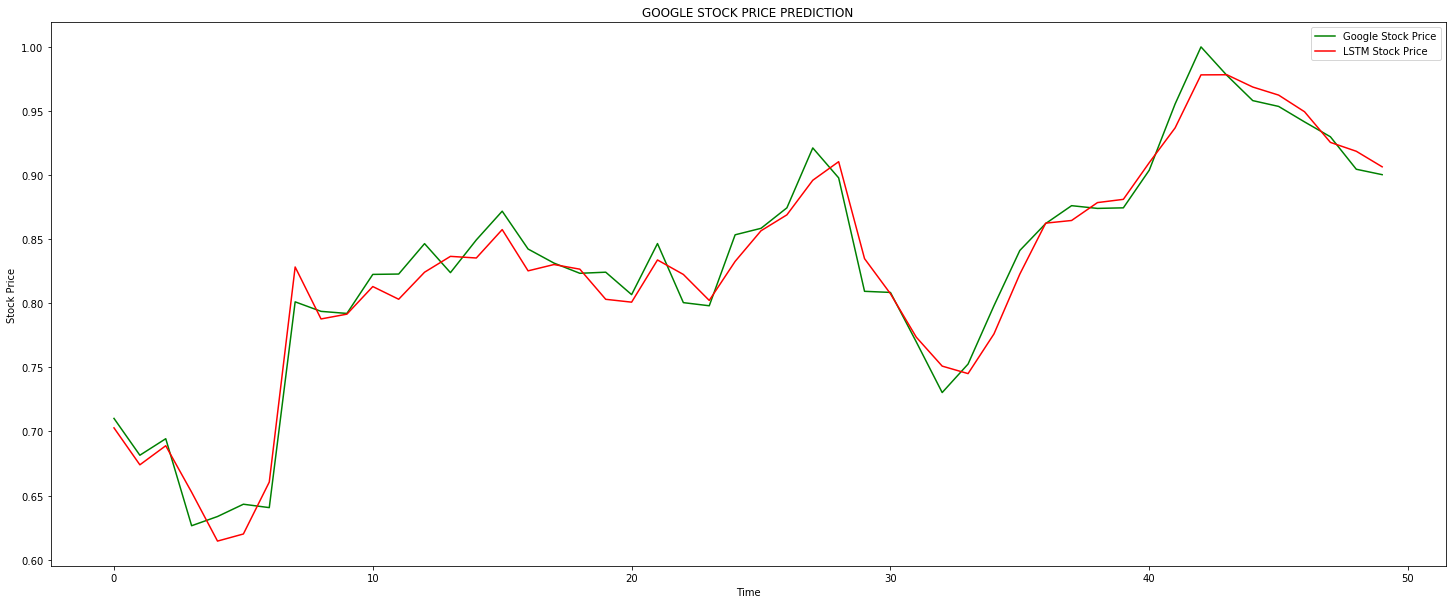

In [236]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(Y_new[200:250], color='green', label='Google Stock Price')
plt.plot(Predict, color='red', label='LSTM Stock Price')
plt.title("GOOGLE STOCK PRICE PREDICTION")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Look our LSTM model is predicting quite well.
